<a href="https://colab.research.google.com/github/lookmeebbear/BKK_BHE/blob/main/BKK_BHE_RunModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Urban Building Height Estimation from Open Remote Sensing**

*Thepchai Srinoi, Phisan Santitamnont, Thirawat Bunnakulpipat*

Department of Survey Engineering

Faculty of Engineering Chulalongkorn University


**ตัวอย่าง การประมาณความสูงอาคารด้วยข้อมูลดาวเทียม**

ดาวน์โหลดภาพดาวเทียม

In [1]:
# https://drive.google.com/file/d/1C8HRIDIS82mt9-MKUfEq2hVIPl5DfOfn/view?usp=drive_link
!gdown https://drive.google.com/uc?id=1C8HRIDIS82mt9-MKUfEq2hVIPl5DfOfn

Downloading...
From (original): https://drive.google.com/uc?id=1C8HRIDIS82mt9-MKUfEq2hVIPl5DfOfn
From (redirected): https://drive.google.com/uc?id=1C8HRIDIS82mt9-MKUfEq2hVIPl5DfOfn&confirm=t&uuid=72889512-a800-4194-a6da-afd6105398a1
To: /content/thesis_train_18082023.tif
100% 146M/146M [00:03<00:00, 47.0MB/s]


ดาวน์โหลดตัวอย่างความสูงอาคาร

In [2]:
# https://drive.google.com/file/d/1y0CPNOPPevS0XJF1quVfhTdr1SjajYdC/view?usp=drive_link
!gdown https://drive.google.com/uc?id=1y0CPNOPPevS0XJF1quVfhTdr1SjajYdC

Downloading...
From: https://drive.google.com/uc?id=1y0CPNOPPevS0XJF1quVfhTdr1SjajYdC
To: /content/input_samp.csv
100% 409k/409k [00:00<00:00, 33.2MB/s]


อ่านไฟล์เก็บข้อมูลรูปอาคารตัวอย่าง

In [3]:
import pandas as pd
import geopandas as gpd

df = pd.read_csv('input_samp.csv')
df

Unnamed: 0.2  Unnamed: 0  Unnamed: 0.1     height  \
0               0         284           284   3.604725   
1               1         116           116   4.658550   
2               2         113           113   4.704632   
3               3          42            42   3.571633   
4               4         126           126   3.661398   
..            ...         ...           ...        ...   
185             5        4150          4150  94.828705   
186             6        4276          4276  94.200745   
187             7        4213          4213  92.096954   
188             8        4038          4038  92.939138   
189             9        3482          3482  93.253204   

                                              geometry         1         2  \
0    POLYGON ((667874.9744347478 1519261.627880778,...  0.064534  0.039651   
1    POLYGON ((668450.7433847992 1518805.9909296336...  0.033705  0.019303   
2    POLYGON ((667911.1709040895 1520374.8703362904...  0.110307  0.042876   
3    POLYGON ((669068.673069556 1520226.97667804, 6...  0.051153  0.020112   
4    POLYGON ((667801.6452166921 1520525.973497308,...  0.094414  0.047955   
..                                                 ...       ...       ...   
185  POLYGON ((668307.4533404789 1519990.653258527,...  0.592714  0.133439   
186  POLYGON ((666067.7950506679 1518939.275646828,...  0.418288  0.135676   
187  POLYGON ((666689.0553167521 1519662.016850892,...  0.266036  0.069434   
188  POLYGON ((667278.6453043597 1519359.135621127,...  0.437104  0.046845   
189  POLYGON ((666444.0075275972 1518992.697577282,...  0.086969  0.022931   

            3         4         5  ...        82        83        84  \
0    0.050327  0.061901  0.080570  ... -0.303383 -0.281449 -0.191999   
1    0.023916  0.027348  0.042797  ... -0.256260 -0.242415 -0.194067   
2    0.054616  0.075907  0.146107  ... -0.268866 -0.219147 -0.210422   
3    0.028158  0.047312  0.065215  ... -0.013970  0.004329  0.071614   
4    0.068088  0.093463  0.106126  ... -0.300299 -0.297654 -0.234767   
..        ...       ...       ...  ...       ...       ...       ...   
185  0.184999  0.457711  0.932131  ... -0.121346 -0.074305 -0.034409   
186  0.203218  0.372249  0.558983  ...  0.110761  0.142239  0.156349   
187  0.095945  0.215886  0.335962  ... -0.182447 -0.147652 -0.094746   
188  0.067098  0.317062  0.683132  ... -0.124271 -0.098344 -0.024473   
189  0.033160  0.057534  0.119785  ... -0.040002 -0.018538  0.052308   

           85        86        87        88        89        90  Height_Round  
0    0.176110  0.110473  0.154233  0.181151  0.198868  0.230785           4.0  
1   -0.173563 -0.205355 -0.201790 -0.180913 -0.141692 -0.130714           5.0  
2    0.172321  0.117880  0.140768  0.171980  0.189694  0.241621           5.0  
3   -0.018797 -0.075158 -0.061318 -0.032265  0.039923  0.048304           4.0  
4    0.024265 -0.028689  0.009410  0.029225  0.048599  0.057823           4.0  
..        ...       ...       ...       ...       ...       ...           ...  
185  0.018845 -0.078884 -0.020208  0.019649  0.053050  0.073825          95.0  
186 -0.048287 -0.095453 -0.080218 -0.055246 -0.018025  0.011519          94.0  
187  0.065039 -0.019312  0.015461  0.057818  0.079542  0.160292          92.0  
188  0.079534 -0.008123  0.024487  0.065003  0.135377  0.259247          93.0  
189  0.010962 -0.072790 -0.030183  0.025501  0.104561  0.130623          93.0  

[190 rows x 96 columns]

แปลงเป็น geopandas

In [4]:
from shapely import wkt
df['geometry'] = df['geometry'].apply(wkt.loads)
gdf = gpd.GeoDataFrame( df, geometry=df.geometry , crs='EPSG:32647')
gdf

Unnamed: 0.2  Unnamed: 0  Unnamed: 0.1     height  \
0               0         284           284   3.604725   
1               1         116           116   4.658550   
2               2         113           113   4.704632   
3               3          42            42   3.571633   
4               4         126           126   3.661398   
..            ...         ...           ...        ...   
185             5        4150          4150  94.828705   
186             6        4276          4276  94.200745   
187             7        4213          4213  92.096954   
188             8        4038          4038  92.939138   
189             9        3482          3482  93.253204   

                                              geometry         1         2  \
0    POLYGON ((667874.974 1519261.628, 667874.517 1...  0.064534  0.039651   
1    POLYGON ((668450.743 1518805.991, 668475.738 1...  0.033705  0.019303   
2    POLYGON ((667911.171 1520374.870, 667894.980 1...  0.110307  0.042876   
3    POLYGON ((669068.673 1520226.977, 669091.583 1...  0.051153  0.020112   
4    POLYGON ((667801.645 1520525.973, 667793.596 1...  0.094414  0.047955   
..                                                 ...       ...       ...   
185  POLYGON ((668307.453 1519990.653, 668304.595 1...  0.592714  0.133439   
186  POLYGON ((666067.795 1518939.276, 666028.142 1...  0.418288  0.135676   
187  POLYGON ((666689.055 1519662.017, 666649.216 1...  0.266036  0.069434   
188  POLYGON ((667278.645 1519359.136, 667321.980 1...  0.437104  0.046845   
189  POLYGON ((666444.008 1518992.698, 666431.097 1...  0.086969  0.022931   

            3         4         5  ...        82        83        84  \
0    0.050327  0.061901  0.080570  ... -0.303383 -0.281449 -0.191999   
1    0.023916  0.027348  0.042797  ... -0.256260 -0.242415 -0.194067   
2    0.054616  0.075907  0.146107  ... -0.268866 -0.219147 -0.210422   
3    0.028158  0.047312  0.065215  ... -0.013970  0.004329  0.071614   
4    0.068088  0.093463  0.106126  ... -0.300299 -0.297654 -0.234767   
..        ...       ...       ...  ...       ...       ...       ...   
185  0.184999  0.457711  0.932131  ... -0.121346 -0.074305 -0.034409   
186  0.203218  0.372249  0.558983  ...  0.110761  0.142239  0.156349   
187  0.095945  0.215886  0.335962  ... -0.182447 -0.147652 -0.094746   
188  0.067098  0.317062  0.683132  ... -0.124271 -0.098344 -0.024473   
189  0.033160  0.057534  0.119785  ... -0.040002 -0.018538  0.052308   

           85        86        87        88        89        90  Height_Round  
0    0.176110  0.110473  0.154233  0.181151  0.198868  0.230785           4.0  
1   -0.173563 -0.205355 -0.201790 -0.180913 -0.141692 -0.130714           5.0  
2    0.172321  0.117880  0.140768  0.171980  0.189694  0.241621           5.0  
3   -0.018797 -0.075158 -0.061318 -0.032265  0.039923  0.048304           4.0  
4    0.024265 -0.028689  0.009410  0.029225  0.048599  0.057823           4.0  
..        ...       ...       ...       ...       ...       ...           ...  
185  0.018845 -0.078884 -0.020208  0.019649  0.053050  0.073825          95.0  
186 -0.048287 -0.095453 -0.080218 -0.055246 -0.018025  0.011519          94.0  
187  0.065039 -0.019312  0.015461  0.057818  0.079542  0.160292          92.0  
188  0.079534 -0.008123  0.024487  0.065003  0.135377  0.259247          93.0  
189  0.010962 -0.072790 -0.030183  0.025501  0.104561  0.130623          93.0  

[190 rows x 96 columns]

ศึกษาจำนวนข้อมูล

In [66]:
print('Interval (m), Count')
print('====================')
for i in range(0, 95, 5) :
    lp = i
    up = i+5
    dfy = df.loc[ df['Height_Round'] < up ]
    dfy = dfy.loc[ dfy['Height_Round'] >= lp ]
    print( str(lp)+'-'+str(up) , ',' , len(dfy) )
print('====================')

Interval (m), Count
0-5 , 7
5-10 , 12
10-15 , 11
15-20 , 9
20-25 , 10
25-30 , 10
30-35 , 11
35-40 , 9
40-45 , 10
45-50 , 9
50-55 , 12
55-60 , 10
60-65 , 9
65-70 , 10
70-75 , 11
75-80 , 10
80-85 , 8
85-90 , 11
90-95 , 10


ลองแสดงผลภาพ

In [7]:
import folium
m = folium.Map(location=[13.736, 100.55], zoom_start=15)

tile = folium.TileLayer(
        tiles = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
        attr = 'Esri',
        name = 'Esri Satellite',
        overlay = False,
        control = True
       ).add_to(m)

def plot_vector( gpd_file , color ):
  gpd_file = gpd_file.to_crs(epsg=4326)
  for _, r in gpd_file.iterrows():
    sim_geo = gpd.GeoSeries(r['geometry'])
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,style_function=lambda x: {'fillColor': color })
    folium.Popup("Height = {} m ".format(r["Height_Round"]) ).add_to(geo_j)
    geo_j.add_to(m)


plot_vector( gdf , 'red' )

m

เลือกข้อมูลที่จำเป็น

In [13]:
dfx = df.copy()
dfx = dfx.drop(columns=['Unnamed: 0.2', 'Unnamed: 0', 'Unnamed: 0.1', 'height', 'geometry'])
dfx

1         2         3         4         5         6         7  \
0    0.064534  0.039651  0.050327  0.061901  0.080570  0.098223  0.602213   
1    0.033705  0.019303  0.023916  0.027348  0.042797  0.054797  0.192296   
2    0.110307  0.042876  0.054616  0.075907  0.146107  0.218429  1.843795   
3    0.051153  0.020112  0.028158  0.047312  0.065215  0.085366  4.079319   
4    0.094414  0.047955  0.068088  0.093463  0.106126  0.142264  0.635445   
..        ...       ...       ...       ...       ...       ...       ...   
185  0.592714  0.133439  0.184999  0.457711  0.932131  1.206746  7.082073   
186  0.418288  0.135676  0.203218  0.372249  0.558983  0.748847  5.613989   
187  0.266036  0.069434  0.095945  0.215886  0.335962  0.524139  2.905084   
188  0.437104  0.046845  0.067098  0.317062  0.683132  0.974496  1.898112   
189  0.086969  0.022931  0.033160  0.057534  0.119785  0.148416  1.154097   

            8         9        10  ...        82        83        84  \
0    0.374618  0.484573  0.594065  ... -0.303383 -0.281449 -0.191999   
1    0.115100  0.135150  0.171673  ... -0.256260 -0.242415 -0.194067   
2    0.471805  0.924459  1.531009  ... -0.268866 -0.219147 -0.210422   
3    0.091740  0.111626  2.816146  ... -0.013970  0.004329  0.071614   
4    0.167666  0.221506  0.462229  ... -0.300299 -0.297654 -0.234767   
..        ...       ...       ...  ...       ...       ...       ...   
185  2.700436  3.382030  6.122255  ... -0.121346 -0.074305 -0.034409   
186  0.993396  1.329080  4.126334  ...  0.110761  0.142239  0.156349   
187  0.554589  0.740798  1.787085  ... -0.182447 -0.147652 -0.094746   
188  0.672579  0.987536  1.346152  ... -0.124271 -0.098344 -0.024473   
189  0.280826  0.347911  0.874330  ... -0.040002 -0.018538  0.052308   

           85        86        87        88        89        90  Height_Round  
0    0.176110  0.110473  0.154233  0.181151  0.198868  0.230785           4.0  
1   -0.173563 -0.205355 -0.201790 -0.180913 -0.141692 -0.130714           5.0  
2    0.172321  0.117880  0.140768  0.171980  0.189694  0.241621           5.0  
3   -0.018797 -0.075158 -0.061318 -0.032265  0.039923  0.048304           4.0  
4    0.024265 -0.028689  0.009410  0.029225  0.048599  0.057823           4.0  
..        ...       ...       ...       ...       ...       ...           ...  
185  0.018845 -0.078884 -0.020208  0.019649  0.053050  0.073825          95.0  
186 -0.048287 -0.095453 -0.080218 -0.055246 -0.018025  0.011519          94.0  
187  0.065039 -0.019312  0.015461  0.057818  0.079542  0.160292          92.0  
188  0.079534 -0.008123  0.024487  0.065003  0.135377  0.259247          93.0  
189  0.010962 -0.072790 -0.030183  0.025501  0.104561  0.130623          93.0  

[190 rows x 91 columns]

สร้างแบบจำลอง

In [14]:
from sklearn import linear_model, datasets, ensemble
import joblib

x = dfx
y = dfx.pop('Height_Round')

OUTPUT_PIK = 'GTB_BHE.pkl'

# Create a based model
reg = ensemble.GradientBoostingRegressor()

#Train the model on training data
model_gbr = reg.fit(x, y)

#Export Model
joblib.dump(model_gbr, OUTPUT_PIK)

['GTB_BHE.pkl']

In [17]:
!pip install rasterio rasterstats

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 3.1 MB/s eta 0:00:00


สร้างราสเตอร์กริดประมาณความสูงอาคาร

In [19]:
import rasterio
from rasterio.features import rasterize
from rasterstats.io import bounds_window
import rasterstats
import numpy as np

model_ALL = joblib.load(OUTPUT_PIK)
raster_file_all = 'thesis_train_18082023.tif'
OUTPUT = 'nDSM_GBR.tif'

def makeDSM(model, new_image ,output_image):

    with rasterio.open(new_image, 'r') as src:
        profile = src.profile
        profile.update(
            dtype=rasterio.float64,
            count=1,
        )
        with rasterio.open(output_image, 'w', **profile) as dst:

            # perform prediction on each small image patch to minimize required memory
            patch_size = 500

            for i in range((src.shape[0] // patch_size) + 1):
                for j in range((src.shape[1] // patch_size) + 1):
                    # define the pixels to read (and write) with rasterio windows reading
                    window = rasterio.windows.Window(
                        j * patch_size,
                        i * patch_size,
                        # don't read past the image bounds
                        min(patch_size, src.shape[1] - j * patch_size),
                        min(patch_size, src.shape[0] - i * patch_size))

                    # read the image into the proper format
                    data = src.read(window=window)


                    # adding indices if necessary
                    img_swp = np.moveaxis(data, 0, 2)
                    img_flat = img_swp.reshape(-1, img_swp.shape[-1])

                    img_w_ind = np.concatenate([img_flat], axis=1)

                    # remove no data values, store the indices for later use
                    m = np.ma.masked_invalid(img_w_ind)
                    #to_predict = img_w_ind[~m.mask].reshape(-1, img_w_ind.shape[-1])
                    to_predict = np.nan_to_num(img_w_ind)
                    # to_predict = img_w_ind
                    # skip empty inputs
                    if not len(to_predict):
                        continue


                    # predict
                    img_preds = model.predict(to_predict)

                    # add the prediction back to the valid pixels (using only the first band of the mask to decide on validity)
                    # makes the assumption that all bands have identical no-data value arrangements
                    output = np.zeros(img_flat.shape[0])
                    #import pdb; pdb.set_trace()
                    output = img_preds.flatten()
                    # resize to the original image dimensions
                    output = output.reshape(*img_swp.shape[:-1])

                    # create our final mask
                    #mask = (~m.mask[:, 0]).reshape(*img_swp.shape[:-1])

                    # write to the final files
                    dst.write(output.astype(rasterio.float64), 1, window=window)
                    #dst.write_mask(mask, window=window)
    print('Output finish ', output_image)
    print('=================================')


#raster_file_all = "stack_satelliteimage_opensky_kernel1.tif"
makeDSM(model_ALL,raster_file_all, OUTPUT)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


Output finish  nDSM_GBR.tif


In [24]:
NDSM = rasterio.open(OUTPUT)
NDSM_img = NDSM.read()

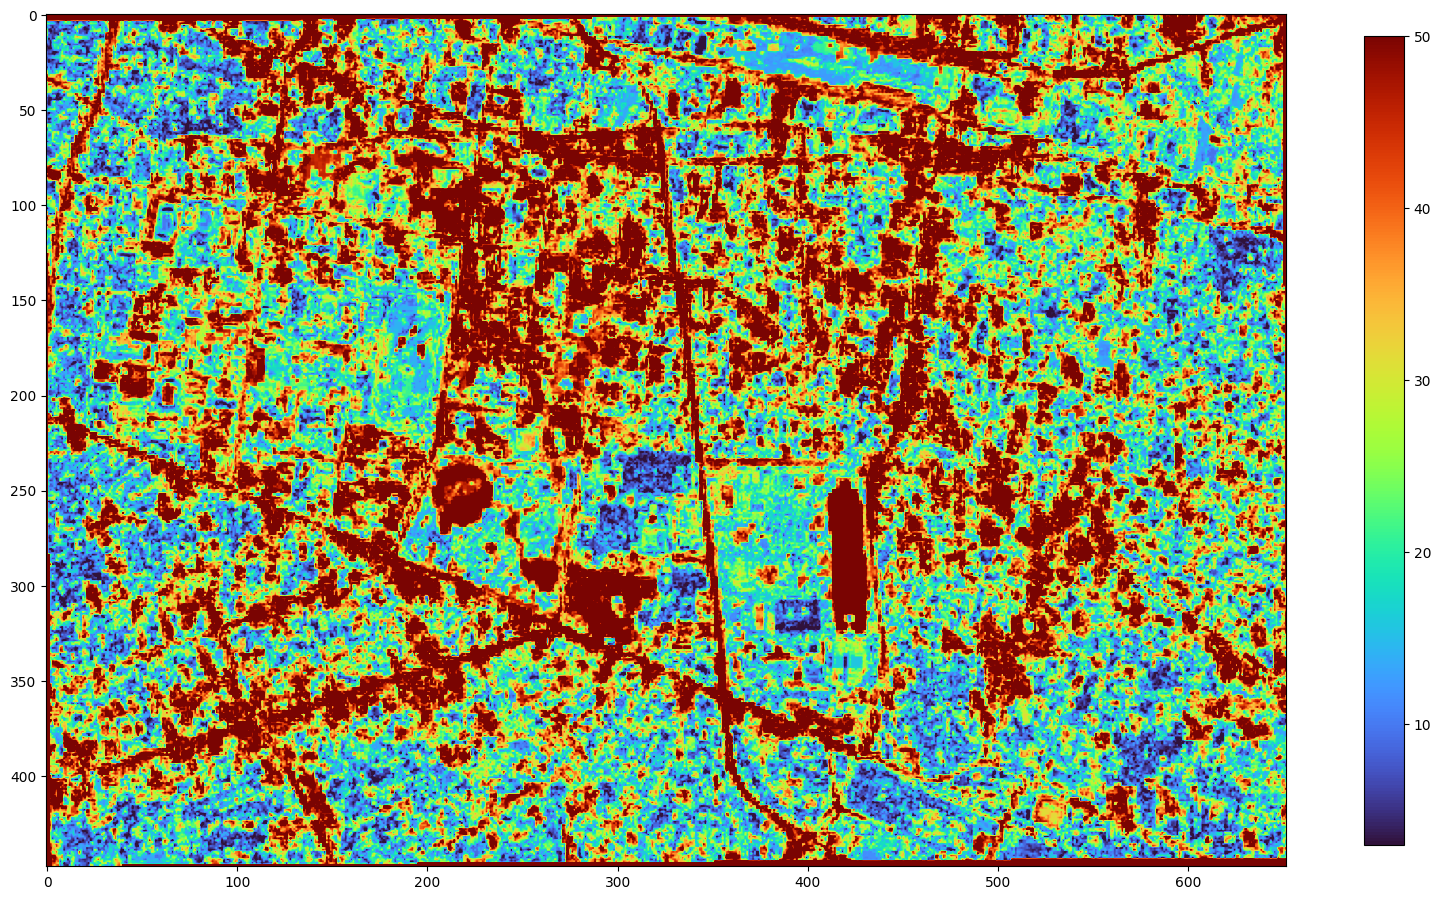

In [40]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,1, figsize=(20,30))
plt.imshow(NDSM_img[0], cmap='turbo', vmin = 3, vmax=50)
plt.colorbar(shrink=0.35)

ตัวอย่างการดึงข้อมูลความสูงอาคารด้วย median zonal statistics

In [42]:
from rasterstats import zonal_stats

# Zonal Statistics ... Median Add Height to Vector Data
stats = gpd.GeoDataFrame(zonal_stats(gdf, OUTPUT, stats=["median"]
                                , band= 1))
# add to dataframe
gdf['Height_Model'] = stats


add to dataframe


เปรียบเทียบความสูงเริ่มต้น กับ ความสูงที่ประมาณได้

In [43]:
gdf[['Height_Round','Height_Model']]

Height_Round  Height_Model
0             4.0      6.040050
1             5.0      6.946730
2             5.0      9.679447
3             4.0     24.061165
4             4.0      5.185740
..            ...           ...
185          95.0     50.958167
186          94.0     79.090238
187          92.0     41.350931
188          93.0     68.715032
189          93.0     73.469667

[190 rows x 2 columns]

In [58]:
import sklearn
import math

y_act = gdf['Height_Round']
y_pred = gdf['Height_Model']

print('TRAINING ACCURACY')
r2_train = sklearn.metrics.r2_score(y_act , y_pred)
print('Rsq =', "{:.2f}".format( r2_train ))
rmse_train = math.sqrt( sklearn.metrics.mean_squared_error(y_act , y_pred) )
print('RMSE =', "{:.3f} m".format( rmse_train ) )

TRAINING ACCURACY
Rsq = 0.64
RMSE = 16.374 m


In [52]:
from scipy.stats import gaussian_kde
def plotden(x,y,lower_part,upper_part,mytitle):
    # Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
    nbins=300
    k = gaussian_kde([x,y])
    xi, yi = np.mgrid[lower_part : upper_part : nbins*1j, lower_part :upper_part : nbins*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))

    # Make the plot
    plt.pcolormesh(xi, yi, zi.reshape(xi.shape), shading='auto')


    x_45 = np.linspace(lower_part,upper_part,270)
    y_45 = x_45
    plt.plot(x_45, y_45, '-w', label = 'unit slope graph')

    X = x.to_numpy().reshape(-1,1)
    y = y.to_numpy().reshape(-1,1)
    lr = linear_model.LinearRegression()
    lr.fit(X, y)
    line_X = np.arange(X.min(), X.max())[:, np.newaxis]
    line_y = lr.predict(line_X)
    plt.plot(line_X, line_y, color="red", label="Linear regressor")
    plt.title(mytitle)
    plt.legend(loc="upper left")
    plt.xlabel('Reference Building Height (m)')
    plt.ylabel('Predicted Building Height (m)')
    plt.show()

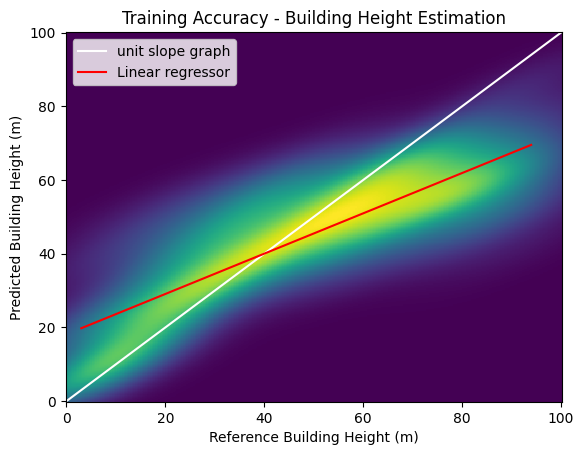

In [53]:
y_act = gdf['Height_Round']
y_pred = gdf['Height_Model']
plotden( y_act , y_pred , 0, 100, 'Training Accuracy - Building Height Estimation')

In [60]:
def RANSAC( act, pre, lower_part,upper_part ) :
  X = act.to_numpy().reshape(-1,1)
  y = pre.to_numpy().reshape(-1,1)
  lr = linear_model.LinearRegression()
  lr.fit(X, y)

  # Robustly fit linear model with RANSAC algorithm
  ransac = linear_model.RANSACRegressor()
  ransac.fit(X, y)
  inlier_mask = ransac.inlier_mask_
  outlier_mask = np.logical_not(inlier_mask)

  # Predict data of estimated models
  line_X = np.arange(X.min(), X.max())[:, np.newaxis]
  line_y = lr.predict(line_X)
  line_y_ransac = ransac.predict(line_X)

  # Compare estimated coefficients
  print("Estimated coefficients (linear regression, RANSAC):")
  print(lr.coef_, ransac.estimator_.coef_)

  lw = 2
  x_45 = np.linspace(lower_part,upper_part,270)
  y_45 = x_45
  plt.plot(x_45, y_45, '-r', label = 'unit slope graph')
  plt.scatter(
      X[inlier_mask], y[inlier_mask], color="yellowgreen", marker=".", label="Inliers"
  )
  plt.scatter(
      X[outlier_mask], y[outlier_mask], color="gold", marker=".", label="Outliers"
  )
  plt.plot(line_X, line_y, color="navy", linewidth=lw, label="Linear regressor")
  plt.plot(
      line_X,
      line_y_ransac,
      color="cornflowerblue",
      linewidth=lw,
      label="RANSAC regressor",
  )


  plt.legend(loc="upper left")
  plt.xlabel("Reference Building Height (m)")
  plt.ylabel("Predicted Building Height (m)")
  plt.show()

Estimated coefficients (linear regression, RANSAC):
[[0.54688657]] [[0.55048251]]


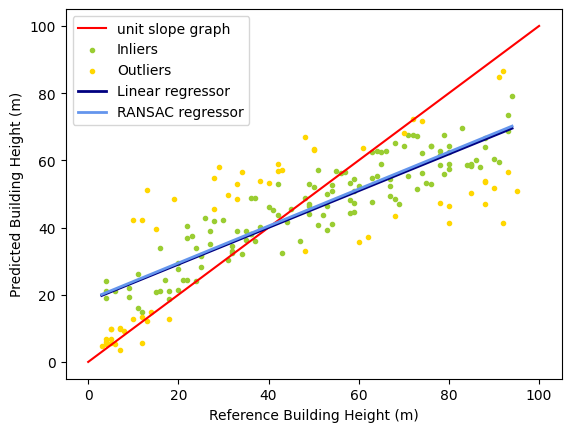

In [61]:
RANSAC( y_act , y_pred , 0 , 100 )